In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2024-07-08 08:26:03.111057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 08:26:03.111156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 08:26:03.242915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')  # 40 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/2196 ━━━━━━━━━━━━━━━━━━━━ 7:04:20 12s/step - accuracy: 0.0625 - loss: 3.6302

I0000 00:00:1720427281.406165     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720427281.429644     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 775/2196 ━━━━━━━━━━━━━━━━━━━━ 6:55 292ms/step - accuracy: 0.2948 - loss: 2.5622

W0000 00:00:1720427507.488736     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.4612 - loss: 1.8911

W0000 00:00:1720427903.148525     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 711s 319ms/step - accuracy: 0.4613 - loss: 1.8909 - val_accuracy: 0.8021 - val_loss: 0.6382
Epoch 2/50
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 1:13 34ms/step - accuracy: 0.8125 - loss: 0.6417

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.8125 - loss: 0.6417 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 3/50


W0000 00:00:1720427982.080410     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 456s 207ms/step - accuracy: 0.8018 - loss: 0.6303 - val_accuracy: 0.8604 - val_loss: 0.4554
Epoch 4/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.7500 - loss: 0.5079 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 5/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 459s 208ms/step - accuracy: 0.8616 - loss: 0.4342 - val_accuracy: 0.8995 - val_loss: 0.3047
Epoch 6/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.8750 - loss: 0.3407 - val_accuracy: 1.0000 - val_loss: 0.1590
Epoch 7/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 448s 203ms/step - accuracy: 0.8880 - loss: 0.3496 - val_accuracy: 0.9331 - val_loss: 0.2005
Epoch 8/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.9062 - loss: 0.3914 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 9/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 452s 205ms/step - accuracy: 0.9017 - loss: 0.3075 - val_accuracy: 0.9522 - val_loss: 0.1436
Epoch 10/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9375 - loss: 0.

In [5]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8560 - loss: 0.4820
Validation Loss: 0.4859672784805298
Validation Accuracy: 0.8539722561836243


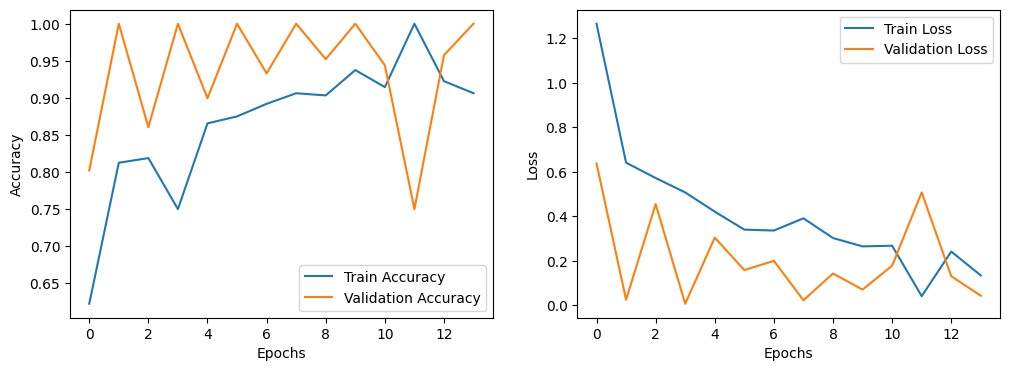

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [7]:
model.save('plant_disease_model.h5')

Test Model


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('/kaggle/working/plant_disease_model.h5')

# List of disease classes
disease_classes = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit the model input
    img_array = img_array / 255.0  # Normalize the image array
    return img_array

def predict_disease_name(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)  # Make predictions
    predicted_class = np.argmax(predictions[0])  # Get the index of the class with the highest probability
    disease_name = disease_classes[predicted_class]  # Map the index to the disease name
    return disease_name

# Example usage
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight1.JPG'
predicted_disease_name = predict_disease_name(img_path)
print(f'Predicted disease: {predicted_disease_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted disease: Potato___Early_blight
